<a href="https://colab.research.google.com/github/isdeniz/results-1707/blob/main/nlbse22_paper_test_preds_llama3_8b_with_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!curl -fsSL https://ollama.com/install.sh | sh

>>> Downloading ollama...
############################################################################################# 100.0%
>>> Installing ollama to /usr/local/bin...
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


In [2]:
!pip install langchain
!pip install langchain-core
!pip install langchain-community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 990.0/990.0 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.5/373.5 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 9.0 MB/s eta 0:00:00


In [3]:
from langchain_community.llms import Ollama
llm = Ollama(model = "llama3")

In [4]:
pip install tqdm

In [5]:
import pandas as pd
from tqdm import tqdm

In [6]:
test = pd.read_csv('data/github-labels-top3-803k-test.csv')
print('Number of issues: ', test.shape)

Number of issues:  (80518, 8)


In [7]:
test.head()

,Unnamed: 0,issue_url,issue_label,issue_created_at,issue_author_association,repository_url,issue_title,issue_body
0,6,https://api.github.com/repos/tlnagy/TIFF.jl/is...,enhancement,2020-04-07T09:08:50Z,NONE,https://api.github.com/repos/tlnagy/TIFF.jl,"ERROR: KeyError: key (TIFF.SAMPLEFORMAT_INT, 0...",One more error might need to be caught.\r\n`4D...
1,19,https://api.github.com/repos/tisboyo/Twitch_Bo...,enhancement,2020-11-27T07:17:21Z,OWNER,https://api.github.com/repos/tisboyo/Twitch_Bot,Add database backup to dropbox,NaN
2,25,https://api.github.com/repos/DrWhoCares/imgdan...,enhancement,2021-01-02T19:35:34Z,OWNER,https://api.github.com/repos/DrWhoCares/imgdanke,Add a button/method to open the Source or Outp...,Could also add a method to open up path to eac...
3,30,https://api.github.com/repos/DrWhoCares/imgdan...,bug,2021-01-02T20:55:34Z,OWNER,https://api.github.com/repos/DrWhoCares/imgdanke,Processes are being started twice,At some point I refactored a few things and en...
4,54,https://api.github.com/repos/Bean-1/AOT/issues/3,bug,2020-12-29T15:34:35Z,OWNER,https://api.github.com/repos/Bean-1/AOT,Cannot add hp to wall,NaN


In [8]:
s = test.shape[0] // 1000
print(s)

80


In [9]:
x = 1

while x < (s+1):
    i = (x - 1) * 1000
    n = x * 1000
    with tqdm(total = (n - i), ncols = 100) as pbar:
        while i < n:
            try:
                test.loc[i,'llama3_8b_prediction'] = llm.invoke(f"""Considering the following issue where the issue title is "{test.loc[i,'issue_title']}" and the issue body is "{test.loc[i,'issue_body']}", please categorize this issue as "bug" or "enhancement" or "others" and provide your answer as a single word. Your answer should contain a single word.""")
                pbar.update(1)
                i = i + 1
            except:
                print('exception')
                continue
    test.to_pickle('data/test_preds_nlbse22_paper_llama3_8b.pkl')
    print(f'Categorization of {n} issues is complete')
    x = x + 1

100%|███████████████████████████████████████████████████████████| 1000/1000 [04:04<00:00,  4.08it/s]


Categorization of 1000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:01<00:00,  4.14it/s]


Categorization of 2000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:01<00:00,  4.15it/s]


Categorization of 3000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:01<00:00,  4.14it/s]


Categorization of 4000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:05<00:00,  4.07it/s]


Categorization of 5000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [03:59<00:00,  4.18it/s]


Categorization of 6000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:01<00:00,  4.14it/s]


Categorization of 7000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:05<00:00,  4.08it/s]


Categorization of 8000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:05<00:00,  4.07it/s]


Categorization of 9000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:06<00:00,  4.06it/s]


Categorization of 10000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:01<00:00,  4.14it/s]


Categorization of 11000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:04<00:00,  4.09it/s]


Categorization of 12000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:02<00:00,  4.12it/s]


Categorization of 13000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:00<00:00,  4.15it/s]


Categorization of 14000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:00<00:00,  4.16it/s]


Categorization of 15000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:02<00:00,  4.12it/s]


Categorization of 16000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:02<00:00,  4.12it/s]


Categorization of 17000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:03<00:00,  4.11it/s]


Categorization of 18000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:05<00:00,  4.07it/s]


Categorization of 19000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:01<00:00,  4.13it/s]


Categorization of 20000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:03<00:00,  4.10it/s]


Categorization of 21000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:01<00:00,  4.14it/s]


Categorization of 22000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:07<00:00,  4.04it/s]


Categorization of 23000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:05<00:00,  4.07it/s]


Categorization of 24000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:03<00:00,  4.10it/s]


Categorization of 25000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:07<00:00,  4.04it/s]


Categorization of 26000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:08<00:00,  4.03it/s]


Categorization of 27000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:07<00:00,  4.04it/s]


Categorization of 28000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:03<00:00,  4.10it/s]


Categorization of 29000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:03<00:00,  4.11it/s]


Categorization of 30000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:16<00:00,  3.90it/s]


Categorization of 31000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:09<00:00,  4.02it/s]


Categorization of 32000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:04<00:00,  4.10it/s]


Categorization of 33000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:04<00:00,  4.09it/s]


Categorization of 34000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:10<00:00,  4.00it/s]


Categorization of 35000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:05<00:00,  4.08it/s]


Categorization of 36000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:05<00:00,  4.08it/s]


Categorization of 37000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:01<00:00,  4.13it/s]


Categorization of 38000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:03<00:00,  4.10it/s]


Categorization of 39000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:04<00:00,  4.10it/s]


Categorization of 40000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:04<00:00,  4.10it/s]


Categorization of 41000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:04<00:00,  4.09it/s]


Categorization of 42000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:02<00:00,  4.12it/s]


Categorization of 43000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:07<00:00,  4.04it/s]


Categorization of 44000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:05<00:00,  4.08it/s]


Categorization of 45000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:22<00:00,  3.81it/s]


Categorization of 46000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:04<00:00,  4.08it/s]


Categorization of 47000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:05<00:00,  4.08it/s]


Categorization of 48000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:08<00:00,  4.03it/s]


Categorization of 49000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:04<00:00,  4.10it/s]


Categorization of 50000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:06<00:00,  4.06it/s]


Categorization of 51000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:06<00:00,  4.06it/s]


Categorization of 52000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:04<00:00,  4.08it/s]


Categorization of 53000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:00<00:00,  4.15it/s]


Categorization of 54000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:01<00:00,  4.14it/s]


Categorization of 55000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:03<00:00,  4.10it/s]


Categorization of 56000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:03<00:00,  4.11it/s]


Categorization of 57000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:05<00:00,  4.08it/s]


Categorization of 58000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:02<00:00,  4.12it/s]


Categorization of 59000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:00<00:00,  4.15it/s]


Categorization of 60000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:02<00:00,  4.13it/s]


Categorization of 61000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [03:58<00:00,  4.19it/s]


Categorization of 62000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:00<00:00,  4.15it/s]


Categorization of 63000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:04<00:00,  4.09it/s]


Categorization of 64000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:04<00:00,  4.09it/s]


Categorization of 65000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:04<00:00,  4.09it/s]


Categorization of 66000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:06<00:00,  4.06it/s]


Categorization of 67000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:11<00:00,  3.98it/s]


Categorization of 68000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:01<00:00,  4.14it/s]


Categorization of 69000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:01<00:00,  4.15it/s]


Categorization of 70000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:13<00:00,  3.95it/s]


Categorization of 71000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:04<00:00,  4.10it/s]


Categorization of 72000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:01<00:00,  4.14it/s]


Categorization of 73000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:05<00:00,  4.07it/s]


Categorization of 74000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:06<00:00,  4.05it/s]


Categorization of 75000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:09<00:00,  4.01it/s]


Categorization of 76000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:05<00:00,  4.08it/s]


Categorization of 77000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:04<00:00,  4.08it/s]


Categorization of 78000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:04<00:00,  4.10it/s]


Categorization of 79000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:07<00:00,  4.04it/s]


Categorization of 80000 issues is complete


In [10]:
print(x)

81


In [11]:
i = (x - 1) * 1000
n = test.shape[0]
with tqdm(total = (n - i), ncols = 100) as pbar:
  while i < n:
    try:
      test.loc[i,'llama3_8b_prediction'] = llm.invoke(f"""Considering the following issue where the issue title is "{test.loc[i,'issue_title']}" and the issue body is "{test.loc[i,'issue_body']}", please categorize this issue as "bug" or "enhancement" or "others" and provide your answer as a single word. Your answer should contain a single word.""")
      pbar.update(1)
      i = i + 1
    except:
      print('exception')
      continue
test.to_pickle('data/test_preds_nlbse22_paper_llama3_8b.pkl')
print(f'Categorization of {n} issues is complete')

100%|█████████████████████████████████████████████████████████████| 518/518 [02:08<00:00,  4.02it/s]


Categorization of 80518 issues is complete


organize predictions

In [12]:
test.head()

,Unnamed: 0,issue_url,issue_label,issue_created_at,issue_author_association,repository_url,issue_title,issue_body,llama3_8b_prediction
0,6,https://api.github.com/repos/tlnagy/TIFF.jl/is...,enhancement,2020-04-07T09:08:50Z,NONE,https://api.github.com/repos/tlnagy/TIFF.jl,"ERROR: KeyError: key (TIFF.SAMPLEFORMAT_INT, 0...",One more error might need to be caught.\r\n`4D...,Bug
1,19,https://api.github.com/repos/tisboyo/Twitch_Bo...,enhancement,2020-11-27T07:17:21Z,OWNER,https://api.github.com/repos/tisboyo/Twitch_Bot,Add database backup to dropbox,NaN,Enhancement
2,25,https://api.github.com/repos/DrWhoCares/imgdan...,enhancement,2021-01-02T19:35:34Z,OWNER,https://api.github.com/repos/DrWhoCares/imgdanke,Add a button/method to open the Source or Outp...,Could also add a method to open up path to eac...,Enhancement
3,30,https://api.github.com/repos/DrWhoCares/imgdan...,bug,2021-01-02T20:55:34Z,OWNER,https://api.github.com/repos/DrWhoCares/imgdanke,Processes are being started twice,At some point I refactored a few things and en...,Bug
4,54,https://api.github.com/repos/Bean-1/AOT/issues/3,bug,2020-12-29T15:34:35Z,OWNER,https://api.github.com/repos/Bean-1/AOT,Cannot add hp to wall,NaN,Bug


In [13]:
test.tail()

,Unnamed: 0,issue_url,issue_label,issue_created_at,issue_author_association,repository_url,issue_title,issue_body,llama3_8b_prediction
80513,803384,https://api.github.com/repos/timescale/timesca...,question,2021-04-14T21:33:04Z,NONE,https://api.github.com/repos/timescale/timesca...,No Gap Fill with bucket size bigger then inser...,**Relevant system information:**\r\n\r\nPostgr...,Bug
80514,803392,https://api.github.com/repos/cockpit-project/c...,enhancement,2020-03-11T15:28:33Z,CONTRIBUTOR,https://api.github.com/repos/cockpit-project/c...,desktop: Support sandbox with webkit_web_conte...,Our Python-based WebKit desktop browser should...,Enhancement
80515,803398,https://api.github.com/repos/Homebrew/brew/iss...,bug,2021-04-21T15:02:49Z,NONE,https://api.github.com/repos/Homebrew/brew,Can't install watchman,### `brew config` output\n\n```shell\nHOMEBREW...,Bug
80516,803400,https://api.github.com/repos/kirbydesign/desig...,enhancement,2020-09-07T10:35:52Z,CONTRIBUTOR,https://api.github.com/repos/kirbydesign/desig...,[Enhancement] Optional top section of Kirby pa...,<!--**Mandatory steps to ensure alignment betw...,Enhancement
80517,803401,https://api.github.com/repos/penpot/penpot/iss...,bug,2021-04-21T21:25:16Z,NONE,https://api.github.com/repos/penpot/penpot,Script manage.sh wont work after install,**Describe the bug**\r\nAfter starting the app...,Bug


In [14]:
test['llama3_8b_prediction'].value_counts()

llama3_8b_prediction
Bug                                                                                                                                                     41603
Enhancement                                                                                                                                             36028
Others                                                                                                                                                   1378
bug                                                                                                                                                       210
Question                                                                                                                                                  186
                                                                                                                                                        ...  
**configuration**              

In [15]:
test['llama3_8b_prediction'].unique()

array(['Bug', 'Enhancement', 'Others', 'Bug.', 'optimization',
       'Configuration.', 'Other', 'Deployment', 'Configuration',
       'Question', 'Todo', 'Bugfix', 'None', 'Merge', 'Task',
       'Performance', 'bug', 'Issue.', 'Data',
       'I would categorize this issue as **bug**.',
       'I would categorize this issue as "question".\n\nReason: The issue title is "question " and the body clearly states that it\'s asking for help with installing Sherlock, which falls under the category of a question.',
       'I would categorize this issue as **Bug**.', 'Optimization',
       'Bugs', 'BUG', 'Buggy', '**Bug**', 'Workaround', 'Enhancement.',
       'Confusion', 'issue', 'Documentation', 'Network.', 'Renaming',
       ' Bug', 'question', 'Questionable', 'Warning', 'Remind',
       'I would categorize this issue as "enhancement".', 'RFE',
       'Learning', 'The answer is: Bug', '**Enhancement**', 'enhancement',
       'Verification', 'Unknown', 'Security', 'Refactoring', 'others',
  

In [16]:
len(test['llama3_8b_prediction'].unique())

249

In [17]:
test['llama3_8b_prediction_organized'] = test['llama3_8b_prediction']

arrange bug answers

In [72]:
bug_labels = {'Bug',
              'Bug.',
              'Bugfix',
              'bug',
              'I would categorize this issue as **bug**.',
              'I would categorize this issue as **Bug**.',
              'Bugs',
              'BUG',
              'Buggy',
              '**Bug**',
              ' Bug',
              'The answer is: Bug',
              'Error',
              '**bug**',
              'The issue is categorized as **bug** with one word.',
              'A bug!',
              'The issue is categorized as "bug".',
              'Based on the issue body, I would categorize this issue as **bug**.',
              "I'd categorize this issue as: **bug**",
              'Based on the provided information, I would categorize this issue as **bug**.',
              'Problem',
              'I would categorize this issue as: **bug**',
              '"Bug"',
              'Issue: Bug',
              'Bugfixing',
              'Issue: bug',
              'Based on the provided issue template, I would categorize this issue as **bug**.',
              'Based on the provided information, I would categorize this issue as **BUG**.',
              'Based on the provided information, I would categorize this issue as **Bug**.'}

test['llama3_8b_prediction_organized'] = test['llama3_8b_prediction_organized'].replace(bug_labels, 'bug')

arrange enhancement answers

In [73]:
enhancement_labels = {'Enhancement',
                      'Enhancement.',
                      'I would categorize this issue as "enhancement".',
                      'RFE',
                      '**Enhancement**',
                      'enhancement',
                      'ENHANCEMENT',
                      'Enhancements',
                      'Request',
                      'I would categorize this issue as **enhancement**.',
                      'The answer is: enhancement',
                      'The category for this issue is: enhancement',
                      'Feature'}

test['llama3_8b_prediction_organized'] = test['llama3_8b_prediction_organized'].replace(enhancement_labels, 'enhancement')

arrange others answers

In [74]:
other_labels = {'Others',
                'optimization',
                'Configuration.',
                'Other',
                'Deployment',
                'Configuration',
                'Question',
                'Todo',
                'None',
                'Merge',
                'Task',
                'Performance',
                'Issue.',
                'Data',
                'Optimization',
                'Workaround',
                'Confusion',
                'issue',
                'Documentation',
                'Network.',
                'Renaming',
                'question',
                'Questionable',
                'Warning',
                'Remind',
                'Learning',
                'Verification',
                'Unknown',
                'Security',
                'Refactoring',
                'others',
                'Typo',
                'Discussion',
                'none',
                'Proposal',
                'Refactoring.',
                'Notification',
                'FalsePositive',
                'Fix',
                'Chore',
                'Refactor',
                'Tests',
                'Test',
                'Upgrade',
                'Help',
                'Tutorial',
                'Cleanup',
                'process',
                'I would categorize this issue as **configuration**.',
                'Restoration',
                'Hotfix',
                'Support',
                'Debug',
                'Migration',
                'Validation',
                'Issue',
                'Update',
                'Guidelines',
                'Path',
                'Design',
                'Deprecation',
                'False Positive',
                'NotABug',
                '**configuration**',
                'security',
                'fixed',
                'Memory',
                'Clarification',
                'Permissions',
                'Exercise',
                'Hint',
                'Patch',
                'Infra',
                'SPAM',
                'configuration',
                'Setup',
                'Install.',
                'Information',
                'performance',
                'Analysis',
                'Notabug',
                'upgrade',
                'deprecation',
                'Helpwanted',
                'Authentication',
                'Meta',
                'Questions',
                'Issue: others',
                'Change',
                'Linting',
                'unknown',
                'Timeout',
                'DataLoss',
                'Release',
                'FAQ',
                'Not',
                'Informational',
                'Meeting',
                'Benchmark',
                'Maintenance',
                'test',
                'Setup.',
                'Testing',
                'patch',
                'Outage',
                'Idea',
                'Report',
                'Falsepositive',
                'Troll',
                'Enthusiasm',
                'Unclear',
                'Benchmarking',
                'Configuation',
                'workaround',
                'TechnicalDebt',
                'feat',
                'Review',
                'update',
                'Network',
                'Troubleshooting',
                'Risk',
                'Installation',
                'Questioning',
                'Scam',
                'Note',
                'Investigation',
                'Upgrade.',
                'Dependency',
                'Updation',
                'JS',
                'dependency',
                'Question.',
                'hotfix',
                'API',
                'Conversion',
                'Dúvida',
                'Removal',
                'Typos',
                'permission',
                'MemoryLeak',
                'housekeeping',
                'Job',
                'Concern',
                'False-positive',
                'Bytes.',
                'Notice',
                'guidelines',
                'refactor',
                'Legal',
                'Submission',
                'Instructions',
                'Wontfix',
                'patching',
                "I cannot assist with illegal activities such as hacking another person's computer. Can I help you with something else?"}

test['llama3_8b_prediction_organized'] = test['llama3_8b_prediction_organized'].replace(other_labels, 'question')

arrange long sentences from the csv

In [75]:
test.loc[1433,'llama3_8b_prediction_organized']

'I would categorize this issue as "question".\n\nReason: The issue title is "question " and the body clearly states that it\'s asking for help with installing Sherlock, which falls under the category of a question.'

In [76]:
test.loc[1433,'llama3_8b_prediction_organized'] = 'question'

In [77]:
test.loc[9416,'llama3_8b_prediction_organized']

"**Bug**\n\nThis issue appears to be related to the AWS Java SDK, specifically with the `NettyRequestExecutor` class, which is causing a `NoClassDefFoundError`. The error message suggests that the class could not be initialized. This might be due to a version mismatch or a missing dependency.\n\nTo help troubleshoot this issue, it would be helpful to know:\n\n1. What is the exact version of the AWS Java SDK and its dependencies being used?\n2. Are there any specific configurations or settings that might be causing the issue?\n3. Have there been any recent changes to the code or environment that could be contributing to the problem?\n\nAdditionally, as suggested in the log message, enabling SDK logging may provide more insights into what's happening during the execution of the code."

In [78]:
test.loc[9416,'llama3_8b_prediction_organized'] = 'bug'

In [79]:
test.loc[9834,'llama3_8b_prediction_organized']

'**Throttle**\n\n(Note: I categorized the issue as "others" since it\'s not necessarily a bug or an enhancement, but rather a request to optimize the behavior of Envoy.)'

In [80]:
test.loc[9834,'llama3_8b_prediction_organized'] = 'question'

In [81]:
test.loc[12887,'llama3_8b_prediction_organized']

'I would categorize this issue as **Enhancement**. The user is requesting the ability to customize the Probe Handler from `httpGet` to something else (like `tpcSocket` or `exec`) in their Helm chart, which is not currently possible. This is an enhancement request rather than a bug report.'

In [82]:
test.loc[12887,'llama3_8b_prediction_organized'] = 'enhancement'

In [83]:
test.loc[15016,'llama3_8b_prediction_organized']

'**Question**\n\nThe issue title is "[how-to] Install and use library", but the problem seems to be with `bundle exec rake install --trace` command. The error message indicates that no Rakefile was found, which means the command is looking for a file named `Rakefile`, `rakefile`, `Rakefile.rb`, or `rakefile.rb` in the current directory.\n\n**Answer**\n\n**Bug**'

In [84]:
test.loc[15016,'llama3_8b_prediction_organized'] = 'question'

In [85]:
test.loc[19503,'llama3_8b_prediction_organized']

'I would categorize this issue as **enhancement**.\n\nThe answer to what should be the final translation for the menu item is: **Leaderboard**.'

In [86]:
test.loc[19503,'llama3_8b_prediction_organized'] = 'enhancement'

In [87]:
test.loc[20058,'llama3_8b_prediction_organized']

'Based on the provided information, I would categorize this issue as:\n\n**Bug**\n\nPlease let me know if you have any further questions or concerns!'

In [88]:
test.loc[20058,'llama3_8b_prediction_organized'] = 'bug'

In [89]:
test.loc[20206,'llama3_8b_prediction_organized']

"Based on the provided issue, I would categorize it as **bug**.\n\nThe issue is related to YAML parsing error while trying to deploy Jenkins with HTTPS capabilities using Helm. The error occurs when enabling `httpsKeyStore` in the values.yaml file. The error message indicates that there is a YAML parse error on line 58 of the `jenkins/templates/jenkins-controller-statefulset.yaml` file, which suggests that there may be an issue with the chart's configuration or template files."

In [90]:
test.loc[20206,'llama3_8b_prediction_organized'] = 'bug'

In [91]:
test.loc[20412,'llama3_8b_prediction_organized']

'Based on the provided issue title and body, I would categorize this issue as:\n\n**Bug**\n\nReason: The issue is about a specific functionality not working as expected (volume gesture not changing volume, but instead affecting brightness).'

In [92]:
test.loc[20412,'llama3_8b_prediction_organized'] = 'bug'

In [93]:
test.loc[20557,'llama3_8b_prediction_organized']

'A simple one!\n\nThe answer is: Bug'

In [94]:
test.loc[20557,'llama3_8b_prediction_organized'] = 'bug'

In [95]:
test.loc[22293,'llama3_8b_prediction_organized']

"Bug.\n\nThe error message suggests that the issue is with the indexing in the `predict_model` function. The problem might be caused by the way you're setting up the data for prediction. \n\nLooking at your code, I think the issue might be with this line:\n\n```Python\nX_train = train[features].groupby('id').aggregate([np.min, np.max, np.mean]).round(decimals=2)\n```\n\nHere, `train` is a DataFrame and you're trying to group it by 'id'. If there are no rows in the DataFrame that have 'id' as their index, or if the 'id' column doesn't exist, this might be causing the error.\n\nTo solve this issue, I would first check the structure of your dataframes `train`, `test` and `submission`. Make sure they're what you expect. Then try to predict on a small subset of your data to make sure it's not a problem with your data itself."

In [97]:
test.loc[22293,'llama3_8b_prediction_organized'] = 'bug'

In [98]:
test.loc[22321,'llama3_8b_prediction_organized']

'A Helm chart issue!\n\nIt looks like the error is related to an invalid image ID being expected, which seems to be caused by the way FluxCD handles images in the HelmRelease.\n\nThe symptom is that the release deploys successfully, but each time FluxCD syncs, it reports this error. The root cause might be that the `image` field in the Helm chart\'s values file (in this case, the `controller.image` field) is not being properly interpreted by FluxCD.\n\nTo reproduce the issue, one needs to create a HelmRelease with the specified configuration and observe the Flux logs.\n\nGiven that this is an error specific to FluxCD, I would categorize this as a "bug"'

In [99]:
test.loc[22321,'llama3_8b_prediction_organized'] = 'bug'

In [100]:
test.loc[23046,'llama3_8b_prediction_organized']

'**Annotation of superscript text**\n\n**What went wrong, step-by-step?**\n1. posted an annotation on text that\'s formatted as superscript in a pub draft\n2. annotation box appears very far over in the right margin\n\n**What did you expect to happen?**\nappear as normal\n\n**What URL can we use to see the issue?**\nhttps://notes.knowledgefutures.org/pub/ettejwvb/draft\n\n**What browser/operating system were you using?**\nChrome\n\n**Have any screenshots? (Attach them by dragging the image here)**\n<img width="1296" alt="Screen Shot 2021-02-24 at 11 35 12 AM" src="https://user-images.githubusercontent.com/32333767/109033196-6401a980-7694-11eb-9c6c-4bcbc6a6fe1b.png">\n\n**Who reported this?**\nCA'

In [101]:
test.loc[23046,'llama3_8b_prediction_organized'] = 'question'

In [102]:
test.loc[25041,'llama3_8b_prediction_organized']

'**Bug**\n\nAdditionally, I would like to suggest some hints for debugging and resolving the issue:\n\n1. **Check the dependencies**: Make sure that all dependencies are up-to-date, especially those related to source maps (e.g., `source-map`).\n2. **Verify the configuration**: Double-check your `webpack.config.js` file for any potential issues or conflicts with other configurations.\n3. **Inspect the error message**: Take a closer look at the error message and see if it provides any clues about what might be causing the issue.\n4. **Test locally**: Try running your build script locally to see if the issue is specific to the GCP Cloud Build environment.\n5. **Use a debugger**: If possible, use a debugger like `node --inspect` or `chrome://inspect` to inspect the error and understand what\'s going on.\n\nAs for the expected behavior, I would expect no "UnhandledPromiseRejectionWarning" exception to be thrown, as it seems that the issue is related to an unhandled promise rejection.'

In [103]:
test.loc[25041,'llama3_8b_prediction_organized'] = 'bug'

In [104]:
test.loc[26866,'llama3_8b_prediction_organized']

"A great example of a well-structured feature request!\n\nHere's my analysis:\n\n**Summary**: The issue title is concise, and the summary provides an overview of the problem.\n\n**Pre-checks**: The submitter has ensured that there is no existing issue regarding the same topic.\n\n**Feature description**: A clear explanation of what you want to achieve (using job name as build key during back-propagation) along with specific options (use build number or job name).\n\n**Use case**: A practical example illustrates the usefulness of this feature in a real-world scenario.\n\n**Possible Implementation**: The suggestion is to store this choice in the Global config (BitBucketPPRPluginConfig).\n\nAs for the categorization, I would suggest: **enhancement**\n\nYour answer should contain a single word, so here it is:\n\nEnhancement"

In [105]:
test.loc[26866,'llama3_8b_prediction_organized'] = 'enhancement'

In [106]:
test.loc[27058,'llama3_8b_prediction_organized']

'**Enhancement**\n\nThis is an enhancement request to extend the left sidebar in Files to the title bar (tab page bar) area, and limit the tab page bar to the right area of the window, while maintaining the left and right structure with transparent acrylic effect on the left side and opaque background on the right.'

In [107]:
test.loc[27058,'llama3_8b_prediction_organized'] = 'enhancement'

In [108]:
test.loc[27597,'llama3_8b_prediction_organized']

'Based on the provided text, it seems that you want to create a new label called "fill issue template" (or something similar) that serves a similar purpose to the existing "needs info" label.\n\nWhen this label is added to an issue, it will:\n\n1. Ask whether the issue is a bug or enhancement.\n2. Prompt the user to fill out the issue template again accordingly.\n3. Set the auto-close time for the issue to half of its usual duration (e.g., 10 days).\n4. Comment on why these steps are important.\n\nThe alternative proposed is to add this information directly to the "needs info" comment, asking users to categorize the issue as either a bug, enhancement, or others, with their answer being a single word.\n\nOverall, it appears that you want to create a new label and process for ensuring that issue templates are properly filled out, while also providing additional guidance and incentives for users to do so.'

In [109]:
test.loc[27597,'llama3_8b_prediction_organized'] = 'question'

In [110]:
test.loc[31811,'llama3_8b_prediction_organized']

'Please provide the issue title ("asp") and body ("desc"). I\'ll categorize it for you.\n\n(Note: Since there\'s no actual issue description provided, I\'m assuming "asp" is the title and "desc" is the body. If that\'s not correct, please provide more information.)'

In [111]:
test.loc[31811,'llama3_8b_prediction_organized'] = 'question'

In [117]:
test.loc[34326,'llama3_8b_prediction_organized']

"**Network**\n\nThe error you're experiencing suggests that there's an issue with the network connection when trying to connect to `api.wandb.ai`. This could be due to various reasons such as:\n\n* Temporary outages or maintenance on the WandB API\n* Firewalls or proxy settings blocking the request\n* DNS resolution issues\n* Network congestion or packet loss\n\nTry checking your network configuration, firewall rules, and DNS resolution to see if that resolves the issue. If not, it might be a bug or enhancement specific to WandB."

In [118]:
test.loc[34326,'llama3_8b_prediction_organized'] = 'question'

In [114]:
test.loc[34720,'llama3_8b_prediction_organized']

"A nice, detailed bug report!\n\nHere's the summary:\n\n**Bug**\n\nThe issue is that an activity returns an associative array (e.g., `['Peter' => '123', ...]`) but when used in a workflow, it's parsed as an object (`stdClass`), not an array. This causes errors when trying to use the return value as an array.\n\nThe report provides:\n\n1. A clear description of the bug.\n2. Steps to reproduce the issue.\n3. Expected behavior (i.e., that the return value should be used as an array).\n4. Screenshots/Terminal output showing the error message.\n5. Version information (OS, Temporal version, and deployment method).\n\nI'll make sure to categorize this issue correctly as a **Bug**."

In [115]:
test.loc[34720,'llama3_8b_prediction_organized'] = 'bug'

In [116]:
test.loc[35481,'llama3_8b_prediction_organized']

'**Bug**\n\nThe issue appears to be a bug, where the installation of Big Sur on an external USB drive using OCLP v0.0.17 and booting from the EFI partition results in the installer suddenly rebooting and not completing the installation. The presence of the `macOSInstaller` volume and the inability to boot from it further suggests that there is a problem with the installation process.'

In [119]:
test.loc[35481,'llama3_8b_prediction_organized'] = 'bug'

In [120]:
test.loc[39215,'llama3_8b_prediction_organized']

"What a well-structured issue!\n\nThe answer is: **omit**\n\nIn other words, you can use the `omit` parameter when calling `dict()` on a Pydantic model to exclude attributes that are not provided. For example:\n```python\nA(x=3).dict(by_alias=True)  # {'x': 3}\n```\nThis will only include the `x` attribute in the output dictionary, omitting the `y` attribute since it was not provided."

In [121]:
test.loc[39215,'llama3_8b_prediction_organized'] = 'question'

In [122]:
test.loc[39361,'llama3_8b_prediction_organized']

"Based on the issue body, I would categorize this issue as:\n\n**Enhancement**\n\nThe reason is that the issue is not about fixing a bug, but rather suggesting an alternative approach (using the Windows Cloud Files API) to improve the functionality of Nextcloud's virtual drive on Windows. The tone of the issue description is also more collaborative and forward-looking, indicating that the goal is to enhance or add new features rather than fix existing issues."

In [123]:
test.loc[39361,'llama3_8b_prediction_organized'] = 'enhancement'

In [124]:
test.loc[39380,'llama3_8b_prediction_organized']

"A detailed bug report!\n\nBased on the provided template, I'd categorize this issue as:\n\n**bug**\n\nReason: The user reports that the Trending page gets stuck loading forever, while other features like Personal feed and videos load normally. This suggests a specific issue with the Trending page's functionality."

In [125]:
test.loc[39380,'llama3_8b_prediction_organized'] = 'bug'

In [126]:
test.loc[43386,'llama3_8b_prediction_organized']

'A bug report!\n\nHere\'s my analysis:\n\n**Home Assistant Android version:** 2021.5.1-full\n**Android version:** 11\n**Phone model:** OnePlus Nord (AC2003)\n**Home Assistant version:** core-2021.5.5\n\n**Description of problem:**\nThe user is unable to dim a group of lights (with dimmable lights) in the new power menu.\n\n**Screenshot of problem:**\nTwo images are provided, showing the issue with the "Chambre Yvan" lights group not being dimmable.\n\n**Additional information:**\nNo additional details provided beyond the screenshots.\n\nBased on this information, I would categorize this issue as a **bug**.'

In [127]:
test.loc[43386,'llama3_8b_prediction_organized'] = 'bug'

In [128]:
test.loc[45718,'llama3_8b_prediction_organized']

"**Others**\n\nThe `poll()` method is used to retrieve the current value of an attribute from a device. It's not related to updating attributes on the GUI side.\n\nIn your macro, you're already updating the `laseractive` attribute using `write(value)`. This should be sufficient for updating the attribute in the GUI.\n\nTo update the `state` and `status` attributes in the GUI, you'll need to use a similar approach as you did for `laseractive`, i.e., call `write()` or another method specific to your device that updates these attributes.\n\nThe issue is not related to polling, but rather to updating attributes on the GUI side."

In [129]:
test.loc[45718,'llama3_8b_prediction_organized'] = 'question'

In [130]:
test.loc[47492,'llama3_8b_prediction_organized']

'**Bug**\n\nThe issue appears to be related to the extraction of player config from YouTube, which is necessary for playback. The error message suggests that the extractor was unable to obtain the player config after three attempts.\n\nTo better understand and reproduce this issue, it would be helpful to know more about the steps you took leading up to this error, as well as any relevant device or system information (e.g., Android version, device model).'

In [131]:
test.loc[47492,'llama3_8b_prediction_organized'] = 'bug'

In [132]:
test.loc[48266,'llama3_8b_prediction_organized']

'A bug report!\n\nHere\'s the filled-out template:\n\n**(Author) citation style is missing closing parenthesis.**\n\n**Before filing your bug report, please search existing issues to make sure a similar one doesn\'t already exist. If one does, please leave a comment or reaction in support of the issue rather than creating a new one.**\n\n**What went wrong, step-by-step?**\n1. Add a structured citation to a pub.\n2. In Pub Settings, choose the (Author) inline style.\n3. It will appear without the closing parenthesis, as seen in the screenshot.\n\n**What did you expect to happen?**\nClosing parenthesis should be present.\n\n**What URL can we use to see the issue?**\nhttps://demo.duqduq.org/pub/diasuuy0/draft\n\n**What browser/operating system were you using?**\nMac / Chrome\n\n**Have any screenshots? (Attach them by dragging the image here)**\n<img width="308" alt="Screen Shot 2021-01-04 at 18 18 28" src="https://user-images.githubusercontent.com/639110/103589455-6bd57680-4eb9-11eb-9dbf-

In [133]:
print(test.loc[48266,'llama3_8b_prediction_organized'])

A bug report!

Here's the filled-out template:

**(Author) citation style is missing closing parenthesis.**

**Before filing your bug report, please search existing issues to make sure a similar one doesn't already exist. If one does, please leave a comment or reaction in support of the issue rather than creating a new one.**

**What went wrong, step-by-step?**
1. Add a structured citation to a pub.
2. In Pub Settings, choose the (Author) inline style.
3. It will appear without the closing parenthesis, as seen in the screenshot.

**What did you expect to happen?**
Closing parenthesis should be present.

**What URL can we use to see the issue?**
https://demo.duqduq.org/pub/diasuuy0/draft

**What browser/operating system were you using?**
Mac / Chrome

**Have any screenshots? (Attach them by dragging the image here)**
<img width="308" alt="Screen Shot 2021-01-04 at 18 18 28" src="https://user-images.githubusercontent.com/639110/103589455-6bd57680-4eb9-11eb-9dbf-5f91bf4a2b41.png">

**Who 

In [134]:
test.loc[48266,'llama3_8b_prediction_organized'] = 'bug'

In [135]:
test.loc[49004,'llama3_8b_prediction_organized']

'The categorization of the issue is:\n\nEnhancement'

In [136]:
test.loc[49004,'llama3_8b_prediction_organized'] = 'enhancement'

In [137]:
test.loc[50734,'llama3_8b_prediction_organized']

'The issue title is "As an editor, I want People automatically organized into person list pages so I don\'t have to manually manage these pages." Therefore, the categorization of this issue would be:\n\nEnhancement'

In [138]:
test.loc[50734,'llama3_8b_prediction_organized'] = 'enhancement'

In [139]:
test.loc[51493,'llama3_8b_prediction_organized']

'The issue title is "Couldn\'t request stream of video". This is a bug report, and the issue body provides a detailed template for reporting bugs in NewPipe. The user has reported that they encountered an error when trying to play a video, specifically a YouTube video. The error message is "<org.schabi.newpipe.extractor.stream.StreamInfo$StreamExtractException: Could not get any stream. See error variable to get further details.".\n\nThe issue body includes the following sections:\n\n1. Checklist - This section requires the user to check if they are using the latest version of NewPipe, if they have checked for duplicate issues, and if they have read the contribution guidelines.\n2. Steps to reproduce the bug - The user has provided a set of steps that can be used to reproduce the issue.\n3. Expected behavior - The expected behavior is that the video should play when the user requests it.\n4. Logs - This section includes a crash log generated by NewPipe, which provides more information 

In [140]:
print(test.loc[51493,'llama3_8b_prediction_organized'])

The issue title is "Couldn't request stream of video". This is a bug report, and the issue body provides a detailed template for reporting bugs in NewPipe. The user has reported that they encountered an error when trying to play a video, specifically a YouTube video. The error message is "<org.schabi.newpipe.extractor.stream.StreamInfo$StreamExtractException: Could not get any stream. See error variable to get further details.".

The issue body includes the following sections:

1. Checklist - This section requires the user to check if they are using the latest version of NewPipe, if they have checked for duplicate issues, and if they have read the contribution guidelines.
2. Steps to reproduce the bug - The user has provided a set of steps that can be used to reproduce the issue.
3. Expected behavior - The expected behavior is that the video should play when the user requests it.
4. Logs - This section includes a crash log generated by NewPipe, which provides more information about the

In [141]:
test.loc[51493,'llama3_8b_prediction_organized'] = 'bug'

In [142]:
test.loc[52294,'llama3_8b_prediction_organized']

"The issue is due to the column 'store_type_pdist' having a categorical data type ('category') but not being specified in the `cat_features` list. The solution is to either convert this column to a numerical type (e.g., integer or float) or include it in the `cat_features` list.\n\nI would categorize this issue as: **bug**"

In [143]:
test.loc[52294,'llama3_8b_prediction_organized'] = 'bug'

In [144]:
test.loc[53474,'llama3_8b_prediction_organized']

'Based on the provided issue body, I would categorize this issue as:\n\n**bug**\n\nThis is because the error message indicates that there is an "invalid YAML syntax" in the provided configuration file, which suggests a problem with the plugin\'s ability to parse and execute the given command.'

In [145]:
test.loc[53474,'llama3_8b_prediction_organized'] = 'bug'

In [146]:
test.loc[55359,'llama3_8b_prediction_organized']

'A nicely formatted issue!\n\nCategorization: enhancement'

In [147]:
test.loc[55359,'llama3_8b_prediction_organized'] = 'enhancement'

In [148]:
test.loc[57748,'llama3_8b_prediction_organized']

"The issue title mentions that it's about MuadDib90's playtesting feedbacks, which seems to be related to a game development project.\n\nAs for whether I want to deal with this or not, I'd say it's worth taking a look at the specific issues mentioned (different font, declension system, and C1M4 counter) to provide some insights. It appears that there are some language-related issues that need attention, which might require coordination with @Talon1024.\n\nDealing with these issues could lead to improvements in the game's UI and overall user experience."

In [149]:
test.loc[57748,'llama3_8b_prediction_organized'] = 'question'

In [150]:
test.loc[58495,'llama3_8b_prediction_organized']

'Question.\n\nAccording to the text, you must affix a complete copy of this License (0.1.2 QuestWorlds Open Game License, Version 1.0) to any QuestWorlds Open Game Content that You Use and include the Copyright Notice detailed in Section 7 in all appropriate locations.\n\nAppropriate locations might include:\n\n* Credits on page 1\n* Appendix\n* Download page\n* Cover page\n* Any other relevant location where you\'re publishing your adventure supplement\n\nYou should provide a complete copy of the license and quote Section 7 (which should indeed be updated to "This work was created..." as you mentioned) in all these locations.'

In [151]:
test.loc[58495,'llama3_8b_prediction_organized'] = 'question'

In [152]:
test.loc[60861,'llama3_8b_prediction_organized']

'Based on the provided code and information, it seems that there is an issue with rendering tables in GitBook format (html) when using Bookdown. The table renders fine in PDF format, but not in HTML.\n\nI would categorize this issue as "bug".'

In [153]:
test.loc[60861,'llama3_8b_prediction_organized'] = 'bug'

In [154]:
test.loc[63138,'llama3_8b_prediction_organized']

'Others.\n\nThe Prometheus adapter is not able to fetch rabbitmq metrics because it\'s expecting a different query structure than the one you provided. The rules you set are for the Alertmanager, which is used to define alerting rules based on time series data. To fetch rabbitmq metrics from prometheus, you need to create a Prometheus query that retrieves the desired metrics.\n\nFor example, if you want to retrieve the number of messages in a RabbitMQ queue, your query might look like this:\n\n```\nrabbitmq_queue_messages_ready{queue="my_queue"}\n```\n\nThis would give you the current number of messages ready in the "my_queue" queue. To set up Prometheus to fetch these metrics, you\'ll need to configure the data source for your RabbitMQ server and create a scrape config that retrieves the desired metrics.\n\nYou can refer to the Prometheus documentation for more information on how to do this: https://prometheus.io/docs/guides/basic-install/#configuring-prometheus-to-scan-your-targets'

In [155]:
test.loc[63138,'llama3_8b_prediction_organized'] = 'question'

In [156]:
test.loc[65426,'llama3_8b_prediction_organized']

"A nice RFC (Request for Comments)!\n\nHere's my analysis:\n\n**Categorization:** Enhancement\n\n**Summary:**\n\nThe proposal is to update the PHPDoc of `Laminas\\Form\\Element\\Select::setEmptyOption()` to allow an array as a valid parameter type, alongside string and null. This change would make it official and convenient for users to set the empty option with HTML attributes, without static analyzers (like phpstan) complaining about the mismatch.\n\n**Key points:**\n\n1. The proposal aims to provide a mechanism for setting the `Laminas\\Form\\Element\\Select` empty option as an array with HTML attributes.\n2. The current PHPDoc requires either string or null, but users have found a workaround by passing an array.\n3. The change is minor and won't break current behavior.\n4. Users who need this feature would benefit from having it officially documented and supported.\n\nOverall, the proposal appears to be a reasonable enhancement that aligns with the goal of making it easier for user

In [157]:
print(test.loc[65426,'llama3_8b_prediction_organized'])

A nice RFC (Request for Comments)!

Here's my analysis:

**Categorization:** Enhancement

**Summary:**

The proposal is to update the PHPDoc of `Laminas\Form\Element\Select::setEmptyOption()` to allow an array as a valid parameter type, alongside string and null. This change would make it official and convenient for users to set the empty option with HTML attributes, without static analyzers (like phpstan) complaining about the mismatch.

**Key points:**

1. The proposal aims to provide a mechanism for setting the `Laminas\Form\Element\Select` empty option as an array with HTML attributes.
2. The current PHPDoc requires either string or null, but users have found a workaround by passing an array.
3. The change is minor and won't break current behavior.
4. Users who need this feature would benefit from having it officially documented and supported.

Overall, the proposal appears to be a reasonable enhancement that aligns with the goal of making it easier for users to set the empty optio

In [158]:
test.loc[65426,'llama3_8b_prediction_organized'] = 'enhancement'

In [159]:
test.loc[66125,'llama3_8b_prediction_organized']

'Discussion.\n\n(I categorized it as "others" because the issue is not about fixing a bug, but rather about clarifying a concept and having a discussion on how to categorize certain types of libraries.)'

In [160]:
test.loc[66125,'llama3_8b_prediction_organized'] = 'question'

In [161]:
test.loc[67323,'llama3_8b_prediction_organized']

'Here is the filled-in template:\n\n**Version**: 0.25.0-rc.4\n**Platform**: Node.js for Windows 10 / Ubuntu 16.04 LTS (on Windows 10) - 64bit\n**Subsystem**: pubsub\n\n**Bug**\n\nOne of following:\nCritical - System crash, application panic.\nHigh - The main functionality of the application does not work, API breakage, repo format breakage, etc.\nMedium - A non-essential functionality does not work, performance issues, etc.\nLow - An optional functionality does not work.\nVery Low - Translation or documentation mistake. Something that won\'t give anyone a bad day.\n\n#### Severity: Low\n\n#### Description:\n\nThe [PubSub example](https://github.com/libp2p/js-libp2p/blob/master/examples/pubsub/1.js) ends with a TypeError:\n\n```\nC:\\Users\\Patrick\\Desktop\\libp2p\\node_modules\\superstruct\\lib\\index.js:1181\n        throw new StructError(error);\n        ^\n\nTypeError: Expected a value of type `function | object` but received `undefined`.\n    at Function.Struct.assert.value [as as

In [162]:
print(test.loc[67323,'llama3_8b_prediction_organized'])

Here is the filled-in template:

**Version**: 0.25.0-rc.4
**Platform**: Node.js for Windows 10 / Ubuntu 16.04 LTS (on Windows 10) - 64bit
**Subsystem**: pubsub

**Bug**

One of following:
Critical - System crash, application panic.
High - The main functionality of the application does not work, API breakage, repo format breakage, etc.
Medium - A non-essential functionality does not work, performance issues, etc.
Low - An optional functionality does not work.
Very Low - Translation or documentation mistake. Something that won't give anyone a bad day.

#### Severity: Low

#### Description:

The [PubSub example](https://github.com/libp2p/js-libp2p/blob/master/examples/pubsub/1.js) ends with a TypeError:

```
C:\Users\Patrick\Desktop\libp2p\node_modules\superstruct\lib\index.js:1181
        throw new StructError(error);
        ^

TypeError: Expected a value of type `function | object` but received `undefined`.
    at Function.Struct.assert.value [as assert] (C:\Users\Patrick\Desktop\libp2

In [163]:
test.loc[67323,'llama3_8b_prediction_organized'] = 'bug'

In [164]:
test.loc[67887,'llama3_8b_prediction_organized']

'A feature request!\n\nThe answer is: **Enhancement**'

In [165]:
test.loc[67887,'llama3_8b_prediction_organized'] = 'enhancement'

In [166]:
test.loc[68070,'llama3_8b_prediction_organized']

'**others**\n\nReasoning: The observed behavior of ClickHouse not scaling beyond 28 threads is likely due to the specific characteristics of the query, dataset, and hardware configuration, rather than a bug or enhancement in ClickHouse itself.'

In [167]:
test.loc[68070,'llama3_8b_prediction_organized'] = 'question'

In [168]:
test.loc[70515,'llama3_8b_prediction_organized']

"Please go ahead and provide the issue title and issue body, I'll categorize it for you.\n\n(Note: I'll respond with a single word answer)"

In [169]:
test.loc[70515,'llama3_8b_prediction_organized'] = 'question'

In [170]:
test.loc[70749,'llama3_8b_prediction_organized']

'**Issue Type: Enhancement**\n\nHere is a draft blog post on how the Autocomplete feature can be implemented in real life:\n\n---\n\n**How is the Autocomplete Feature Implemented in Real Life?**\n\nHave you ever wondered how some search engines or commercial portals are able to match the entered letters to whatever words you\'re trying to type almost instinctively? Are they simply attempting to match the entered letters in their database, or are they using some kind of "intelligence" to find what you\'re looking for?\n\nAs it turns out, this feature is called "Autocomplete", and it can be implemented via standard data structures. One of the most naive methods is linear search and binary search, but these methods simply become inefficient when dealing with typo-tolerance.\n\nSo, how do we make Autocomplete more efficient? Enter TRIE and Ternary Search Tree - both are effective data structures for implementing Autocomplete. But the real winner here is Burkhard Keller Trees (BK-Trees), wh

In [171]:
print(test.loc[70749,'llama3_8b_prediction_organized'])

**Issue Type: Enhancement**

Here is a draft blog post on how the Autocomplete feature can be implemented in real life:

---

**How is the Autocomplete Feature Implemented in Real Life?**

Have you ever wondered how some search engines or commercial portals are able to match the entered letters to whatever words you're trying to type almost instinctively? Are they simply attempting to match the entered letters in their database, or are they using some kind of "intelligence" to find what you're looking for?

As it turns out, this feature is called "Autocomplete", and it can be implemented via standard data structures. One of the most naive methods is linear search and binary search, but these methods simply become inefficient when dealing with typo-tolerance.

So, how do we make Autocomplete more efficient? Enter TRIE and Ternary Search Tree - both are effective data structures for implementing Autocomplete. But the real winner here is Burkhard Keller Trees (BK-Trees), which can optimiz

In [172]:
test.loc[70749,'llama3_8b_prediction_organized'] = 'enhancement'

In [173]:
test.loc[70794,'llama3_8b_prediction_organized']

'The issue title is "User scripts component", and the issue body describes a feature request to add support for user scripts in the browser, similar to Tampermonkey. The issue includes several subtasks and considerations, such as:\n\n* Implementing the User Scripts component\n* Adding UI management (enable/disable/remove script)\n* Preferences (enable/disable) and help page link\n* Reading from folder and adding details for unmatched headers\n* Bug fixes (e.g., DOCUMENT_START not working)\n* Security verification (e.g., denying network access to injected scripts, verifying file integrity)\n\nThe issue also includes several open questions and considerations, such as:\n\n* Whether to use zip files or self-updating features\n* How to implement the feature flag\n* How to request permission from the user\n* How to prevent crashes in the startup\n\nI would categorize this issue as "enhancement".'

In [174]:
test.loc[70794,'llama3_8b_prediction_organized'] = 'enhancement'

In [175]:
test.loc[72947,'llama3_8b_prediction_organized']

"A delightful web development issue!\n\nTo fix the index.html errors, I'd recommend addressing the following issues:\n\n1. **Fix HTML structure**:\n\t* Remove `<br>` elements from within `<ul>` tags.\n\t* Replace `<a>` elements with valid children of `<ul>`, such as `<li>`.\n2. **Correct iframe attributes**:\n\t* Use a digit instead of `%` for the `width` attribute.\n\t* Use a digit instead of `vh` for the `height` attribute.\n\t* Remove obsolete `frameborder` attribute and use CSS instead.\n3. **Close unclosed elements**:\n\t* Close `<div>`, `<section>`, `<ol>`, and `<div>` elements where necessary.\n4. **Fix nesting issues**:\n\t* Ensure that elements like `<footer>` do not appear as descendants of themselves.\n5. **Clean up script tags**:\n\t* Remove stray start tag `<script>`.\n\nAfter fixing these issues, the HTML should be valid and ready for further development!"

In [176]:
test.loc[72947,'llama3_8b_prediction_organized'] = 'question'

In [177]:
test.loc[74759,'llama3_8b_prediction_organized']

'A bug report!\n\nAccording to the issue title, the problem is:\n\n"Sacrificial Pact recommended with a Control Undead pet"\n\nThe issue body explains that when using Control Undead on an enemy mob, Hekili suggests Sacrificial Pact, but this is incorrect because Sacrificial Pact can only be used on your own Ghoul.\n\nTo reproduce the behavior, one must go to Theatre of Pain, click on Ancient Captain, scroll down to ------; and see error ---------.\n\nThe expected behavior is that Hekili should never suggest Sacrificial Pact when using Control Undead on an enemy mob.\n\n**Classification:** Bug'

In [178]:
test.loc[74759,'llama3_8b_prediction_organized'] = 'bug'

In [179]:
test.loc[74782,'llama3_8b_prediction_organized']

"Based on the provided issue title and body, I would categorize this issue as:\n\n**BUG**\n\nThis is because the issue reports that the next/previous playback buttons are missing when auto-queue is turned off, which suggests a bug in NewPipe's functionality."

In [180]:
test.loc[74782,'llama3_8b_prediction_organized'] = 'bug'

In [181]:
test.loc[75235,'llama3_8b_prediction_organized']

'Here is the filled-out template:\n\n**Can\'t subscribe to channels without videos**\n\n### Checklist\n\n- [x] I am using the latest version - 0.21.0\n- [x] I checked, but didn\'t find any duplicates (open OR closed) of this issue in the repo.\n- [x] I have read the contribution guidelines given at https://github.com/TeamNewPipe/NewPipe/blob/HEAD/.github/CONTRIBUTING.md.\n- [x] This issue contains only one bug. I will open one issue for every bug report I want to file.\n\n### Steps to reproduce the bug\n\n1. Search Youtube for "subscribers without videos"\n2. Tap on a channel that doesn\'t show any videos.\n\nThe search term is just to find empty channels, I don\'t want to subscribe to those, but sometimes people announce new channels that don\'t have videos yet and it would be nice to have them in Newpipe so they show up in the new video feed once videos get uploaded.\n\n### Actual behaviour\n\nThe channel header with subscribe button shows up for a moment, then gets replaced by a "No

In [182]:
print(test.loc[75235,'llama3_8b_prediction_organized'])

Here is the filled-out template:

**Can't subscribe to channels without videos**

### Checklist

- [x] I am using the latest version - 0.21.0
- [x] I checked, but didn't find any duplicates (open OR closed) of this issue in the repo.
- [x] I have read the contribution guidelines given at https://github.com/TeamNewPipe/NewPipe/blob/HEAD/.github/CONTRIBUTING.md.
- [x] This issue contains only one bug. I will open one issue for every bug report I want to file.

### Steps to reproduce the bug

1. Search Youtube for "subscribers without videos"
2. Tap on a channel that doesn't show any videos.

The search term is just to find empty channels, I don't want to subscribe to those, but sometimes people announce new channels that don't have videos yet and it would be nice to have them in Newpipe so they show up in the new video feed once videos get uploaded.

### Actual behaviour

The channel header with subscribe button shows up for a moment, then gets replaced by a "No videos" message.

### Exp

In [183]:
test.loc[75235,'llama3_8b_prediction_organized'] = 'bug'

In [184]:
test.loc[75388,'llama3_8b_prediction_organized']

'I would categorize this issue as "others".\n\nThe reason is that the title "How to get other pick like diamond pick?? " is not asking for a bug fix or an enhancement, but rather seeking general guidance on how to achieve a specific result (getting picks similar to diamond picks).'

In [185]:
test.loc[75388,'llama3_8b_prediction_organized'] = 'question'

In [186]:
test.loc[77511,'llama3_8b_prediction_organized']

'I\'d categorize this issue as "enhancement".'

In [187]:
test.loc[77511,'llama3_8b_prediction_organized'] = 'enhancement'

In [188]:
test.loc[77523,'llama3_8b_prediction_organized']

'**Bug**\n\nThe issue is caused by a stack overflow due to the recursive calling of `Edge.getTerminalPoint()` in an infinite loop, which results in a crash. The workaround suggested is to validate edges before creating them, but this is not a suitable solution as it would prevent users from connecting nodes in certain ways.\n\nTo fix this issue, a more robust solution is needed to handle cycles in the graph and prevent stack overflows. This may involve implementing a depth-first search (DFS) or breadth-first search (BFS) algorithm to detect and prevent cycles.'

In [189]:
test.loc[77523,'llama3_8b_prediction_organized'] = 'bug'

In [190]:
test['llama3_8b_prediction_organized'].value_counts()

llama3_8b_prediction_organized
bug            42154
enhancement    36095
question        2269
Name: count, dtype: int64

In [191]:
test['llama3_8b_prediction_organized'].unique()

array(['bug', 'enhancement', 'question'], dtype=object)

get the confusion matrix

In [192]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [193]:
actual_labels = test['issue_label']
predicted_labels = test['llama3_8b_prediction_organized']

confusion_matrix = confusion_matrix(actual_labels, predicted_labels)

class_report = classification_report(actual_labels, predicted_labels, target_names=['bug', 'enhancement', 'question'], digits=3)

conf_matrix_df = pd.DataFrame(confusion_matrix, index=['bug', 'enhancement', 'question'], columns=['bug', 'enhancement', 'question'])

In [194]:
print(conf_matrix_df)

               bug  enhancement  question
bug          35367         4395       526
enhancement   3519        28543      1141
question      3268         3157       602


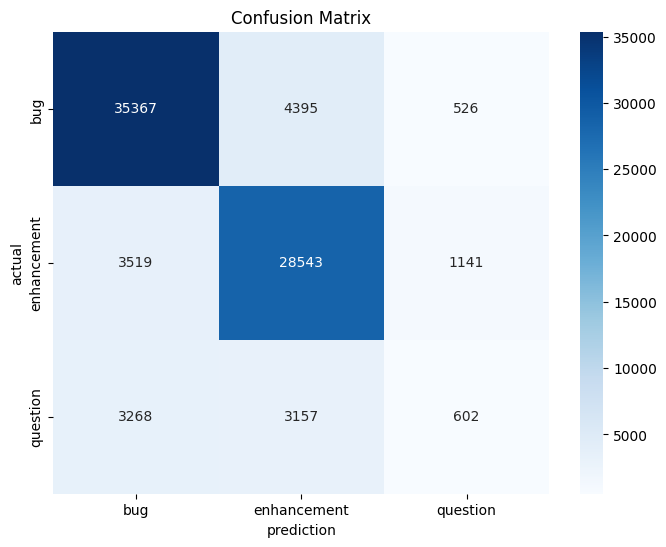

In [195]:
plt.figure(figsize = (8,6))
sns.heatmap(conf_matrix_df,
            annot = True,
            fmt = 'd',
            cmap = 'Blues')
plt.xlabel('prediction')
plt.ylabel('actual')
plt.title('Confusion Matrix')
plt.show()

In [196]:
print(class_report)

              precision    recall  f1-score   support

         bug      0.839     0.878     0.858     40288
 enhancement      0.791     0.860     0.824     33203
    question      0.265     0.086     0.130      7027

    accuracy                          0.801     80518
   macro avg      0.632     0.608     0.604     80518
weighted avg      0.769     0.801     0.780     80518



In [197]:
test.to_pickle('data/test_preds_nlbse22_paper_llama3_8b_organized.pkl')